In [12]:
import numpy as np
import pandas as pd
import os

pa=[38.30,42.03,44.76]
pe=[7.5,17.5,22.5,27.5,32.5]
b=[0,10,15,20,25]
kappa=2.094215255 
zeta              = 1.66e-4*1e11

In [13]:
df_ori=pd.read_csv('section7_2_78sites\\hmc_78SitesModel.csv')
dfz_bar= df_ori['zbar_2017_78Sites']
dfz_bar_np=dfz_bar.to_numpy()

## Figure 5

In [14]:
variable_dict = {}
for j in range(5):
    order=j
    os.chdir("section7_2_78sites\\gams\\p_a_42.03_p_e_{}".format(pe[order]))
    dfz= pd.read_csv('amazon_data_z.dat', delimiter='\t').drop('T/R ', axis=1)
    dfz_zeronp=dfz.to_numpy()
    dfx= pd.read_csv('amazon_data_x.dat', delimiter='\t').drop('T   ', axis=1)
    dfx_np =dfx.to_numpy()
    variable_dict[f"results_zper{j}"] = []
    variable_dict[f"results_xagg{j}"] = dfx_np[:51]
    variable_dict[f"results_xagg_100{j}"]=[i*100 for i in variable_dict[f"results_xagg{j}"]]
    for i in range(51):
        result_zper =np.sum(dfz_zeronp[i])/(np.sum(dfz_bar_np)/1e11)
        variable_dict[f"results_zper{j}"].append(result_zper)
        variable_dict[f"results_zper_100{j}"]=[i * 100 for i in variable_dict[f"results_zper{j}"]]


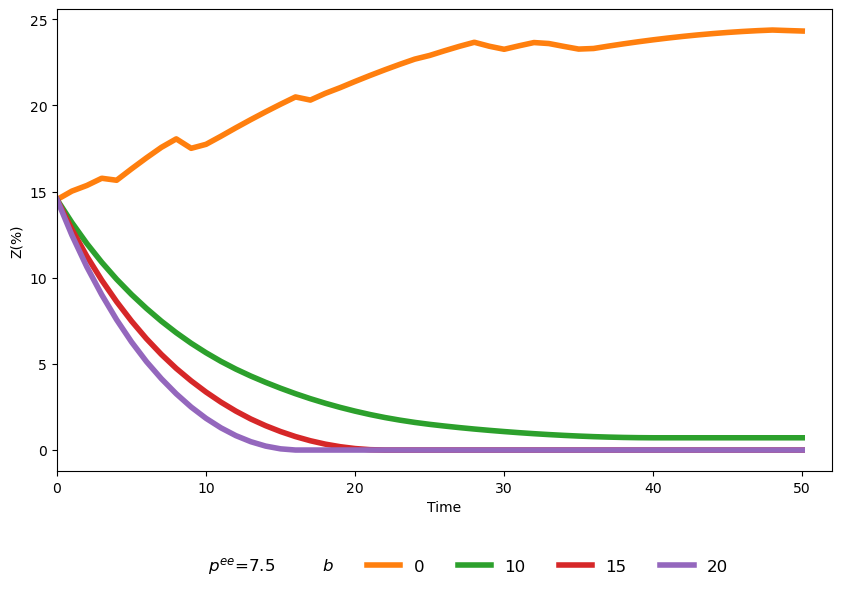

In [21]:
import matplotlib.pyplot as plt
time = list(range(0, len(variable_dict[f"results_zper_100{0}"])))
plt.figure(figsize=(10, 6))
custom_labels = ["$p^{ee}$=7.5         $b$", "0", "10", "15", "20"]

plt.plot([], [], ' ', label=custom_labels[0])  
for i in range(4):  
    plt.plot(time, variable_dict[f"results_zper_100{i}"], label=custom_labels[i+1], linewidth=4)
plt.xlabel('Time')
plt.ylabel('Z(%)')
plt.xlim(0, max(time)+2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5,frameon=False,fontsize='large')
plt.savefig('Figure5_1.png', format='png', bbox_inches='tight')
plt.show()

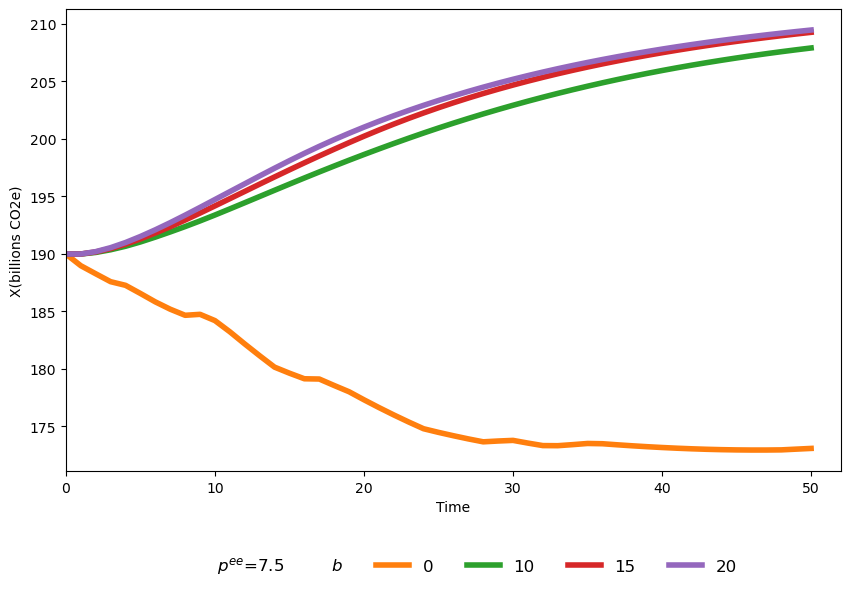

In [22]:
plt.figure(figsize=(10, 6))
plt.plot([], [], ' ', label=custom_labels[0])  
for i in range(4):  
    plt.plot(time, variable_dict[f"results_xagg_100{i}"], label=custom_labels[i+1], linewidth=4)
plt.xlabel('Time')
plt.ylabel('X(billions CO2e)')
plt.xlim(0, max(time)+2)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5,frameon=False,fontsize='large')
plt.savefig('Figure5_2.png', format='png', bbox_inches='tight')
plt.show()